# Analysis of met and met phi corrections

The goal is to minimize the chi squared of the bins events in bins by shifting mc values to achieved a better a agreement between data and mc.


In [1]:
run ../prep_ana.py

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading plotting specs...
8 or 13 TeV:13TeV
unc_mc_process and scales as dictionaries
Load MC and Data?False
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [2]:
data_path = '../data_13TeV/out_Z'

In [3]:
%matplotlib inline

# MET Analysis

In [4]:
columns = [ 'process', 'process_decay',
        'weight', 'lep1_Charge', 'lep2_Charge', 'lep_Type', 'numbExtraLep',
        'tot_npv', 'mll', 'numb_jets', 'metMod',
        'lep1_pt', 'lep2_pt', 'lep3_pt', 'dPhiLL',
        'jet1_pt', 'jet2_pt', 'HT', 'numb_BJet',
        'METProj_sin', 'met_over_sET','METProj_trk_sin', 'met_phi',
        'dPhiLLMET',  'mllMET', 'qT', 'recoil', 'dPhiLLJet', 'dPhiMETJet']

df_dy0 = rp.read_root(data_path+"/dyjetstoll_m-50_complete.root", columns=columns)
df_dy_m_10 = rp.read_root(data_path+"/dyjetstoll_m-10to50_complete.root", columns=columns)
df_ww = rp.read_root(data_path+"/ww_complete.root", columns=columns)
df_tt_l = rp.read_root(data_path+"/ttbar_leptonic_complete.root", columns=columns)
df_tt_sl = rp.read_root(data_path+"/ttbar_semileptonic_complete.root", columns=columns)
df_t_s = rp.read_root(data_path+"/t_s-_complete.root", columns=columns)
df_t_t = rp.read_root(data_path+"/t_t-_complete.root", columns=columns)
df_t_tw = rp.read_root(data_path+"/t_tw-_complete.root", columns=columns)
#df_tbar_s = rp.read_root(data_path+"/tbar_s-_complete.root", columns=columns)
df_tbar_t = rp.read_root(data_path+"/tbar_t-_complete.root", columns=columns)
df_tbar_tw = rp.read_root(data_path+"/tbar_tw-_complete.root", columns=columns)
df_zz_ln = rp.read_root(data_path+"/zzjetsto2l2nu_complete.root", columns=columns)
df_zz_lq = rp.read_root(data_path+"/zzjetsto2l2q_complete.root", columns=columns)
df_wz_lq = rp.read_root(data_path+"/wzjetsto2l2q_complete.root", columns=columns)
df_wz_ln = rp.read_root(data_path+"/wzjetsto3lnu_complete.root", columns=columns)
df_w1j = rp.read_root(data_path+"/w1jetstolnu_complete.root", columns=columns)
df_w2j = rp.read_root(data_path+"/w2jetstolnu_complete.root", columns=columns)
df_w3j = rp.read_root(data_path+"/w3jetstolnu_complete.root", columns=columns)
df_w4j = rp.read_root(data_path+"/w4jetstolnu_complete.root", columns=columns)

df = pd.concat([df_dy0, df_dy_m_10, df_tt_l, df_tt_sl, df_zz_ln, df_zz_lq, df_wz_lq, df_wz_ln, df_w1j, df_w2j, df_w3j, df_w4j, df_ww,
               df_tbar_tw, df_tbar_t,df_t_tw,  df_t_t, df_t_s])

In [5]:
df_da_b = rp.read_root(data_path+"/muon_2016B_complete.root", columns=columns)
df_da_c = rp.read_root(data_path+"/muon_2016C_complete.root", columns=columns)
df_da_d = rp.read_root(data_path+"/muon_2016D_complete.root", columns=columns)
df_da_e = rp.read_root(data_path+"/muon_2016E_complete.root", columns=columns)
df_da_f = rp.read_root(data_path+"/muon_2016F_complete.root", columns=columns)
df_da_g = rp.read_root(data_path+"/muon_2016G_complete.root", columns=columns)
df_da_h = rp.read_root(data_path+"/muon_2016H_complete.root", columns=columns)

df_da = pd.concat([df_da_b, df_da_c, df_da_d, df_da_e, df_da_f, df_da_g, df_da_h])

In [26]:
additional_weights = [0.93099457 * 1.52459359,  1.00659943 * 0.97341388,  1.16975021 * 0.58699]

jets_values = df.numb_jets.values
weight_values = df.weight.values
label_values = df.process.values
for jets in xrange(3):
    weight_values[ (jets_values == jets) & (label_values == 'DY') ] = weight_values[ (jets_values == jets) & (label_values == 'DY') ] * additional_weights[jets]
    

[ 0.93099457  1.00659943  1.16975021  0.53453106  0.33456537 -0.05536355
 -0.59229183 -1.22982311 -1.76002526 -6.08508348]


(<matplotlib.figure.Figure at 0x181fe7410>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x183b14b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18281bb10>], dtype=object))

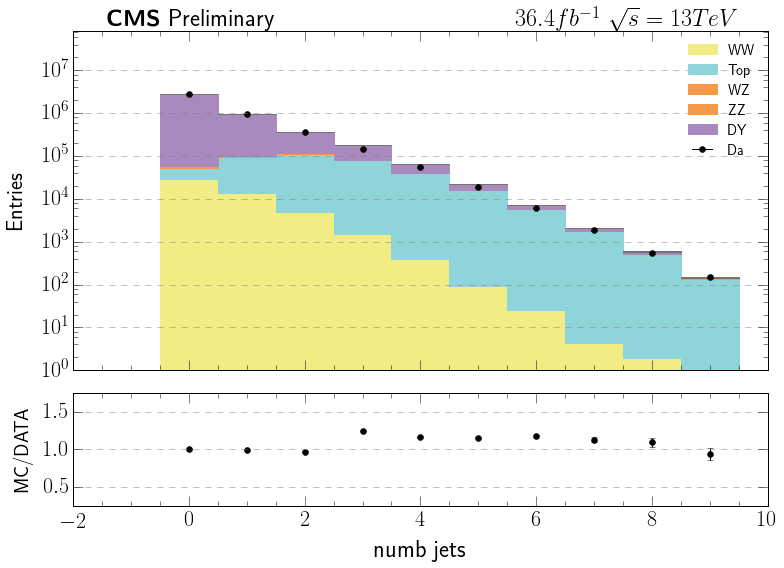

In [28]:
mc = bin_df( df[(df.mll > 30) & (df.numb_BJet == 0)], "numb_jets", )
da = bin_df( df_da[(df_da.mll > 30) & (df_da.numb_BJet == 0)], "numb_jets",)

full_plot(mc, da, color="color_1")

(<matplotlib.figure.Figure at 0x183847150>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1831b4450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1648410d0>], dtype=object))

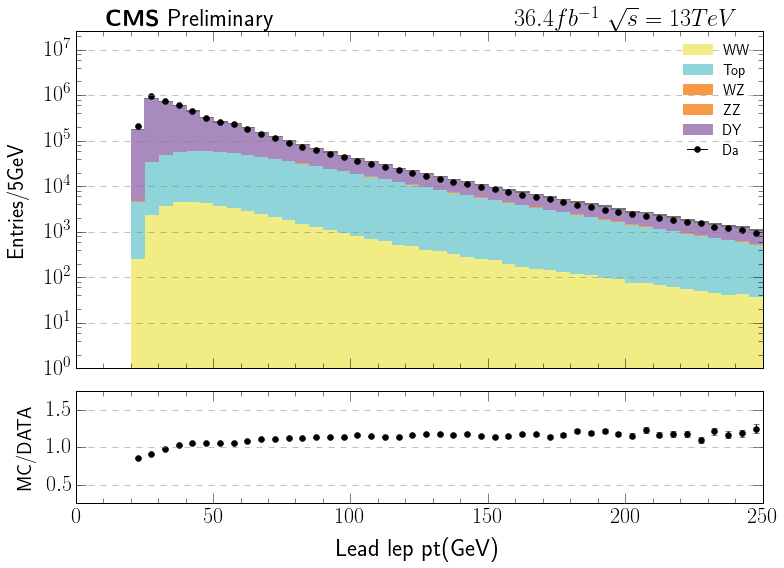

In [29]:
mc = bin_df( df[(df.mll > 30) ], "lep1_pt", )
da = bin_df( df_da[(df_da.mll > 30)], "lep1_pt",)

full_plot(mc, da, color="color_1")

(<matplotlib.figure.Figure at 0x13de65210>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x183110710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18570b090>], dtype=object))

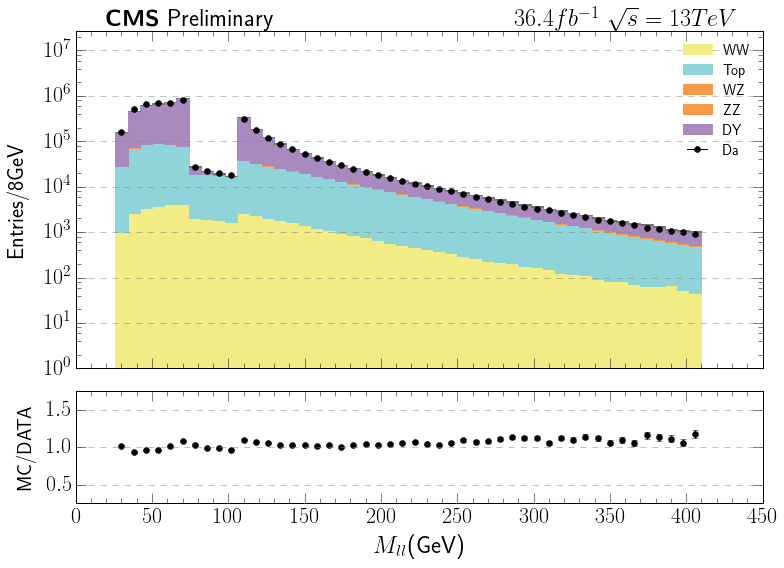

In [32]:
mc = bin_df( df[(df.mll > 30) ], "mll", )
da = bin_df( df_da[(df_da.mll > 30)], "mll",)

full_plot(mc, da, color="color_1")

# MET Phi Analysis 

In [21]:
alpha = 1.019384555152
a = df.met_phi.values * 1. + alpha
#a[ df.process.values == "DY"]= a[ df.process.values == "DY"] + alpha
a[ a > np.pi ] = a[ a > np.pi ] - 2*np.pi
df["met_phi_corrected"] = a

bins_mc = bin_df( df, "met_phi_corrected", range=(-np.pi, np.pi))
bins_da = bin_df( df_da, "met_phi",range=(-np.pi, np.pi))


for i in range(6):
    tot_mc = np.zeros( bins_mc[ bins_mc.keys()[0] ][0].shape[0] )

    for process in bins_mc.keys():
        if process != "plotting":
            tot_mc += bins_mc[process][0]

    print "iter:", i, ( ( tot_mc  - bins_da["Da"][0])**2 / bins_da["Da"][0]  ).sum(),\
    ( 2*( tot_mc - bins_da["Da"][0]) / bins_da["Da"][0]  ).sum() * 1. / 30.,\
    alpha
    alpha = alpha  +  ( 2*( tot_mc - bins_da["Da"][0]) / bins_da["Da"][0]  ).sum() * 1. / 30.
    a = df.met_phi.values + alpha

    a[ a > np.pi ] = a[ a > np.pi ] - 2*np.pi
    df["met_phi_corrected"] = a
    
    bins_mc = bin_df( df, "met_phi_corrected", range=(-np.pi, np.pi),)

iter: 0 84329.746864 0.0294338929135 1.01938455515
iter: 1 84447.0075169 0.0294450629647 1.04881844807
iter: 2 85087.9611584 0.0295653663697 1.07826351103
iter: 3 86386.012114 0.029798610622 1.1078288774
iter: 4 88288.1007747 0.0301827952471 1.13762748802
iter: 5 90670.5603459 0.0306482357411 1.16781028327


In [19]:
range(3)

[0, 1, 2]

In [18]:
len(df.keys())

68

# End

In [2]:
rp.read_root?